In [1]:
import sys

!{sys.executable} --version

Python 3.12.8


NOTE: Use `Shift+Tab` to show contextual tab.

https://github.com/DeepReinforcementLearning/DeepReinforcementLearningInAction

## Sampling 

In [2]:
from collections import deque

replay = deque(maxlen=10)
for i in range(20):
    replay.append(i)

replay

deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)

In [3]:
import random

random.sample(replay, 5)

[14, 10, 19, 17, 13]

## Index

In [4]:
replay = deque(maxlen=10)
for i in range(20):
    replay.append((i, i + 1, i + 2))
replay

deque([(10, 11, 12),
       (11, 12, 13),
       (12, 13, 14),
       (13, 14, 15),
       (14, 15, 16),
       (15, 16, 17),
       (16, 17, 18),
       (17, 18, 19),
       (18, 19, 20),
       (19, 20, 21)],
      maxlen=10)

In [5]:
sample = random.sample(replay, 5)
sample

[(18, 19, 20), (13, 14, 15), (10, 11, 12), (12, 13, 14), (11, 12, 13)]

In [6]:
import numpy as np

np.array(sample)[:, [0]]

array([[18],
       [13],
       [10],
       [12],
       [11]])

## Torch

In [7]:
import torch

a = torch.Tensor([[1, 2, 3]])
b = torch.Tensor([[4, 5, 6]])
torch.cat((a, b), 0)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [8]:
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6.]])

In [9]:
torch.flip(torch.arange(10), dims=(0,))

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [10]:
sample = torch.rand(3, 4)
sample

tensor([[0.1642, 0.3313, 0.3480, 0.6576],
        [0.8368, 0.2726, 0.0423, 0.7977],
        [0.6579, 0.7833, 0.9663, 0.5712]])

In [11]:
torch.flip(sample, dims=(0,))

tensor([[0.6579, 0.7833, 0.9663, 0.5712],
        [0.8368, 0.2726, 0.0423, 0.7977],
        [0.1642, 0.3313, 0.3480, 0.6576]])

In [12]:
torch.flip(sample, dims=(0, 1))

tensor([[0.5712, 0.9663, 0.7833, 0.6579],
        [0.7977, 0.0423, 0.2726, 0.8368],
        [0.6576, 0.3480, 0.3313, 0.1642]])

In [13]:
torch.flip(sample, dims=(1,))

tensor([[0.6576, 0.3480, 0.3313, 0.1642],
        [0.7977, 0.0423, 0.2726, 0.8368],
        [0.5712, 0.9663, 0.7833, 0.6579]])

## Setting up gym

done


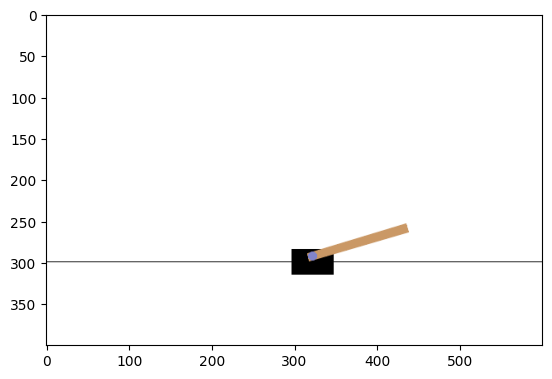

In [14]:
# pip install gymnasium[classic-control]
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render())  # Just call this once.
for i in range(100):
    img.set_data(env.render())
    # plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    env.step(env.action_space.sample())  # take a random action

env.close()
print("done")

In [15]:
from collections import namedtuple

Transition = namedtuple("Transition", ["state", "action", "reward"])

t = Transition("up", 1, 10)
t.state

'up'

In [16]:
transitions = [Transition("up", i, 10) for i in range(10)]
transitions

[Transition(state='up', action=0, reward=10),
 Transition(state='up', action=1, reward=10),
 Transition(state='up', action=2, reward=10),
 Transition(state='up', action=3, reward=10),
 Transition(state='up', action=4, reward=10),
 Transition(state='up', action=5, reward=10),
 Transition(state='up', action=6, reward=10),
 Transition(state='up', action=7, reward=10),
 Transition(state='up', action=8, reward=10),
 Transition(state='up', action=9, reward=10)]

In [17]:
batch = Transition(*zip(*transitions))
batch

Transition(state=('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up'), action=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), reward=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10))

In [18]:
batch.state

('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up')

In [19]:
batch.action

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [20]:
import numpy as np
import torch

In [21]:
n = np.random.rand(2, 3)
n, torch.from_numpy(n)

(array([[0.48510714, 0.4649105 , 0.60356689],
        [0.24908803, 0.12008177, 0.15119823]]),
 tensor([[0.4851, 0.4649, 0.6036],
         [0.2491, 0.1201, 0.1512]], dtype=torch.float64))

In [22]:
t = torch.rand((2, 3))
t, t.shape

(tensor([[0.5693, 0.1065, 0.8633],
         [0.9884, 0.6572, 0.0326]]),
 torch.Size([2, 3]))

In [23]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6]])
t, t.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 torch.Size([2, 3]))

In [24]:
t[0], t[1]

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [25]:
a = torch.stack((t, t))
b = torch.stack((t, t), dim=1)
c = torch.stack((t, t), dim=2)
print(a, a.shape)
print(b, b.shape)
print(c, c.shape)

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([2, 2, 3])
tensor([[[1., 2., 3.],
         [1., 2., 3.]],

        [[4., 5., 6.],
         [4., 5., 6.]]]) torch.Size([2, 2, 3])
tensor([[[1., 1.],
         [2., 2.],
         [3., 3.]],

        [[4., 4.],
         [5., 5.],
         [6., 6.]]]) torch.Size([2, 3, 2])


In [26]:
print(a[0])
print(a[1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [27]:
print(b[0])
print(b[1])

tensor([[1., 2., 3.],
        [1., 2., 3.]])
tensor([[4., 5., 6.],
        [4., 5., 6.]])


In [28]:
a = torch.stack((t, t, t))
b = torch.stack((t, t, t), dim=1)
c = torch.stack((t, t, t), dim=2)
print(a, a.shape)
print(b, b.shape)
print(c, c.shape)

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([3, 2, 3])
tensor([[[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],

        [[4., 5., 6.],
         [4., 5., 6.],
         [4., 5., 6.]]]) torch.Size([2, 3, 3])
tensor([[[1., 1., 1.],
         [2., 2., 2.],
         [3., 3., 3.]],

        [[4., 4., 4.],
         [5., 5., 5.],
         [6., 6., 6.]]]) torch.Size([2, 3, 3])


In [29]:
a = torch.cat((t, t))  # (2,3), (2,3) = (4,3), adds the 0 dim
b = torch.cat((t, t), dim=1)  # (2, 3), (2,3) = (2, 6), adds the 1 dim
print(a, a.shape)
print(b, b.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]]) torch.Size([4, 3])
tensor([[1., 2., 3., 1., 2., 3.],
        [4., 5., 6., 4., 5., 6.]]) torch.Size([2, 6])


In [30]:
a = torch.cat((t, t, t))
b = torch.cat((t, t, t), dim=1)
print(a, a.shape)
print(b, b.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]]) torch.Size([6, 3])
tensor([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
        [4., 5., 6., 4., 5., 6., 4., 5., 6.]]) torch.Size([2, 9])


In [31]:
import random

random.randint(0, 1)  # Generates between lo (inclusive) and hi (inclusive)

1

In [32]:
np.random.randint(0, 1)  # Generates between lo (inclusive) and hi (exclusive)

0

## One Hot Encode

In [9]:
import torch
import torch.nn.functional as F

t = torch.arange(0, 6)

print(t)
F.one_hot(t)

tensor([0, 1, 2, 3, 4, 5])


tensor([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]])

In [23]:
F.one_hot(t, num_classes=10)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [26]:
F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [25]:
F.one_hot(torch.tensor(1), num_classes=3)

tensor([0, 1, 0])

In [28]:
F.one_hot(torch.tensor(2), num_classes=3)

tensor([0, 0, 1])

In [30]:
# RuntimeError: Class values must be smaller than num_classes.
# F.one_hot(torch.tensor(3), num_classes=3)

In [13]:
t.view((3, 2))

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [17]:
t.view((2, 3))

tensor([[0, 1, 2],
        [3, 4, 5]])

In [21]:
t.view((1, 2, 3))

tensor([[[0, 1, 2],
         [3, 4, 5]]])

In [31]:
t.view((3, 2, 1))

tensor([[[0],
         [1]],

        [[2],
         [3]],

        [[4],
         [5]]])

## Single value

In [40]:
a_list = torch.Tensor([1])
an_item = torch.tensor(1)
print(a_list)
print(an_item)

tensor([1.])
tensor(1)


In [42]:
a_list.item(), an_item.item()

(1.0, 1)

In [44]:
detached = a_list.detach()
detached

tensor([1.])

In [46]:
detached[0] = 2

In [47]:
detached

tensor([2.])